In [1]:
import numpy as np
import cv2 as cv
from PIL import Image, ImageOps
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

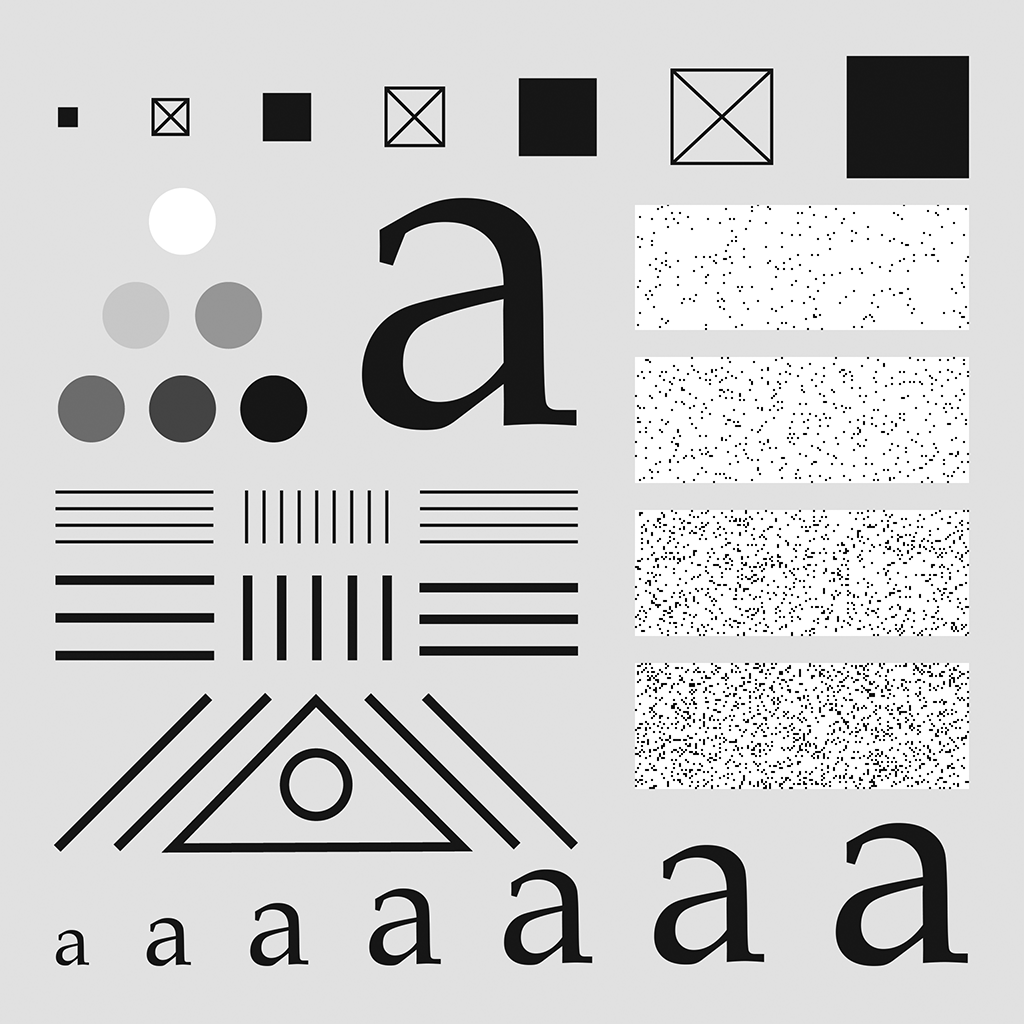

In [2]:
img = Image.open("testpattern1024.tif")
img

In [3]:
arr_img  = np.asarray(img)
arr_img.shape[1]

1024

In [4]:
def Convolve(img, kernel):
    img_h = img.shape[0]
    img_w = img.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(img.shape) == 3):
        image_pad = np.pad(img, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(img.shape) == 2):
        image_pad = np.pad(img, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    h = kernel_h // 2
    w = kernel_w // 2
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]

In [5]:
def Gaussian_Kernel(sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m, n = filter_size//2, filter_size//2
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    return gaussian_filter

In [6]:
def Low_Pass_Filter(img, sigma):
    im_filtered = np.zeros_like(img, dtype=np.float32)
    #for i in range(3):
    im_filtered[:] = Convolve(img[:], Gaussian_Kernel(sigma))
    return (im_filtered.astype(np.uint8))

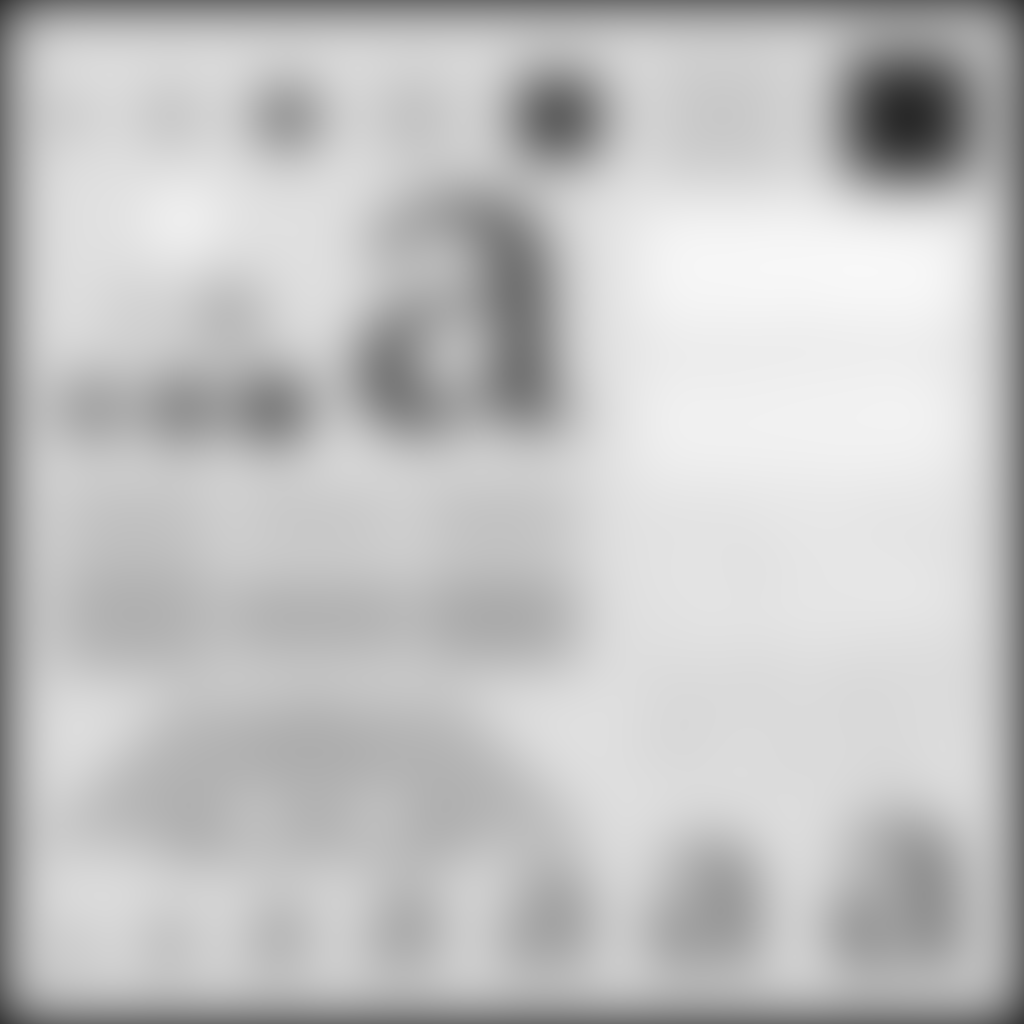

In [7]:
a = Low_Pass_Filter(arr_img, 31)
img1 = Image.fromarray(a)
img1.save("37a.png")
img1

### **Part b**

In [18]:
img2 = Image.open('37a.png')
img2 = ImageOps.invert(img2)
img2 = np.array(img2)

In [19]:
def thresold(img, thresold):
    row, col = img.shape[0], img.shape[1]
    for i in range(row):
        for j in range(col):
            if img[i][j] < thresold:
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img

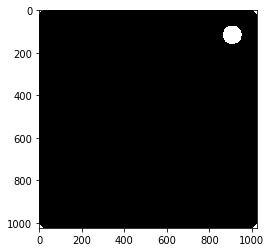

In [23]:
b = thresold(img2, 170)
plt.imshow(b, "gray")
plt.show()
b = Image.fromarray(b)
b.save("37b.png")